Machine Learning Project
Author: Nick Elias
GitHub Project Repository: https://github.com/NickElias01/datafun-07-ml 

In [68]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

## Part 1 - Chart a Straight Line

"In this section, we’ll use a technique called simple linear regression to make predictions from time series data. We’ll use the 1895 through 2018 January average high temperatures in New York City to predict future average January high temperatures and to estimate the average January high temperatures for years preceding 1895." -Deitel and Deitel

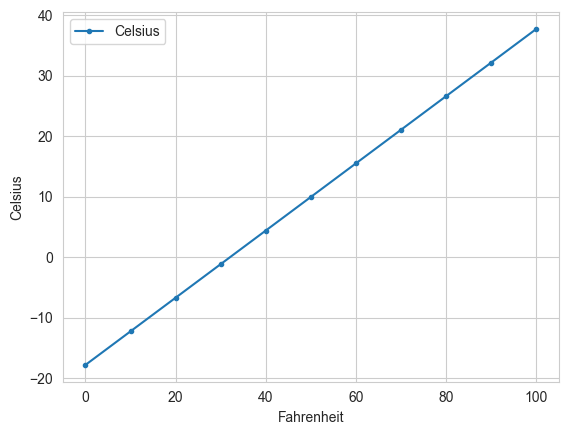

In [69]:
c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns= ['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

Let's use Linear Regression on Average High Temperatures in NYC in January.

### Section 1 - Data Acquisition

In [70]:
""" Load the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series in Data folder, taken from:
https://www.ncdc.noaa.gov/cag/ """

nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')



### Section 2 - Data Inspection

In [71]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [72]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [73]:
# For readability, let’s rename the 'Value' column as 'Temperature':

nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Seaborn labels the tick marks on the x-axis with Date values. 
Since this example processes only January temperatures, the x-axis labels will be more readable if they do not contain 01 (for January), we’ll remove it from each Date. 

First, let’s check the column’s type:

In [74]:
nyc_df.Date.dtype

dtype('int64')

In [75]:
# Truncating the date column by dividing all values in column by 100

nyc_df.Date = nyc_df.Date.floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [76]:
pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

The SciPy (Scientific Python) library is widely used for engineering, science and math in Python. Its stats module provides function linregress, which calculates a regression line’s slope and intercept for a given set of data points:
The object returned by linregress contains the regression line’s slope and intercept:

In [77]:
linear_regression = stats.linregress(
    x = nyc_df.Date,
    y = nyc_df.Temperature
    )

linear_regression.slope


np.float64(0.014771361132966163)

In [78]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

Let’s predict the average Fahrenheit temperature for January of 2024. 
In the following calculation, linear_regression.slope is m, 2019 is x (the date value for which you’d like to predict the temperature), and linear_regression.intercept is b:

In [79]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

We also can approximate what the average temperature might have been in the years before 1895. 
For example, let’s approximate the average temperature for January of 1890:

In [80]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

Next, let’s use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis.

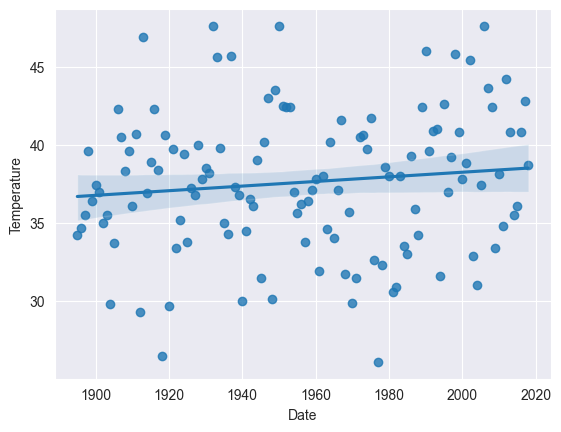

In [81]:
sns.set_style('darkgrid')
axes = sns.regplot(x = nyc_df.Date, y = nyc_df.Temperature)

In [82]:
axes.set_ylim(10,70)

(10.0, 70.0)